Iteration 0: Cost = 2.302687860431422, Training Accuracy = 10.57%
Iteration 100: Cost = 1.0823535095055634, Training Accuracy = 75.53%
Iteration 200: Cost = 0.5331598129444459, Training Accuracy = 86.12%
Iteration 300: Cost = 0.42038422906343426, Training Accuracy = 88.64%
Iteration 400: Cost = 0.37240034829948565, Training Accuracy = 89.61%
Iteration 500: Cost = 0.3446404599518443, Training Accuracy = 90.31%
Iteration 600: Cost = 0.32542854011118577, Training Accuracy = 90.77%
Iteration 700: Cost = 0.31058420265075776, Training Accuracy = 91.18%
Iteration 800: Cost = 0.2981977908172641, Training Accuracy = 91.51%
Iteration 900: Cost = 0.2872354417723609, Training Accuracy = 91.85%
Final Test Cost = 0.26873234027938697, Test Accuracy = 92.46%


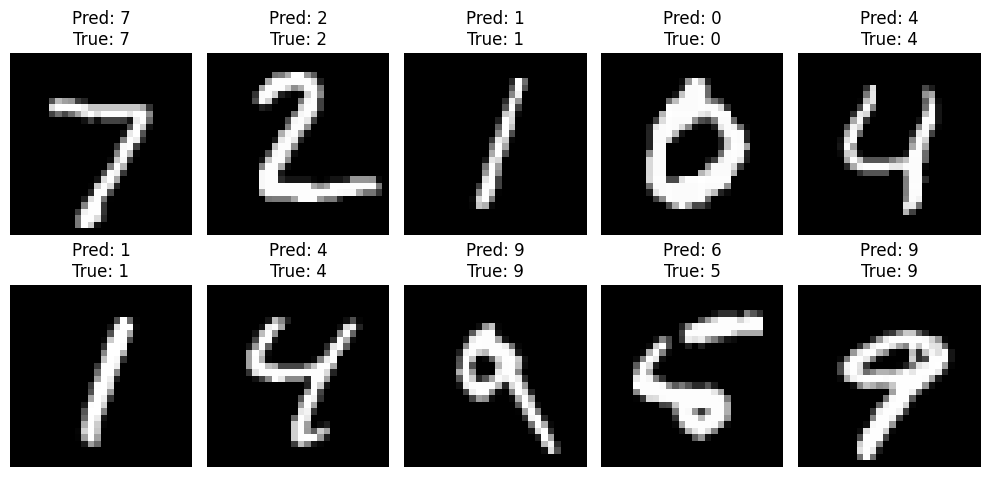

In [4]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
# Load MNIST dataset
def load_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # Normalize pixel values to between 0 and 1
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    # Flatten images into 1D vectors
    X_train = X_train.reshape((X_train.shape[0], -1))
    X_test = X_test.reshape((X_test.shape[0], -1))
    # Convert labels to categorical (one-hot encoding)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2


def relu(Z):
    return np.maximum(0,Z)
    
def relu_derivative(Z): #we need relu derivation for backprop 
    return (Z>0).astype(int)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    cache = (Z1, A1, Z2, A2)
    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[0]
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / m
    return cost

def backward_propagation(X, Y, cache, W1, W2):
    m = X.shape[0]
    Z1, A1, Z2, A2 = cache

    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def model(X_train, y_train_one_hot, X_test, y_test, hidden_size, learning_rate, num_iterations):
    input_size = X_train.shape[1]
    output_size = y_train_one_hot.shape[1]
    
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    
    for i in range(num_iterations):
        A2, cache = forward_propagation(X_train, W1, b1, W2, b2)
        cost = compute_cost(A2, y_train_one_hot)
        
        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train_one_hot, cache, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if i % 100 == 0:
            train_accuracy = np.mean(np.argmax(A2, axis=1) == np.argmax(y_train_one_hot, axis=1))
            print(f"Iteration {i}: Cost = {cost}, Training Accuracy = {train_accuracy * 100:.2f}%")
    
    # Evaluate on test set
    A2, _ = forward_propagation(X_test, W1, b1, W2, b2)
    test_accuracy = np.mean(np.argmax(A2, axis=1) == np.argmax(y_test, axis=1))
    test_cost = compute_cost(A2, y_test)
    print(f"Final Test Cost = {test_cost}, Test Accuracy = {test_accuracy * 100:.2f}%")
    
    return W1, b1, W2, b2

def predict(X, W1, b1, W2, b2):
    A2, _ = forward_propagation(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=1)
    return predictions

# Load the data
X_train, y_train_one_hot, X_test, y_test_one_hot = load_mnist()

# Train the model
W1, b1, W2, b2 = model(X_train, y_train_one_hot, X_test, y_test_one_hot, hidden_size=64, learning_rate=0.1, num_iterations=1000)



In [1]:
# Display some images with predictions
num_examples = 10
plt.figure(figsize=(10, 5))
for i in range(num_examples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}\nTrue: {np.argmax(y_test_one_hot[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined